# Credit Card Churning predicition

Hi there 👋, Please find inside this repository a code which analyses the probability of a customer staying with the bank based on his details. 

Credit card churning is the practice of repeatedly opening new credit cards to earn sign-up bonuses and then typically stopping use of them. This is a real problem for banks and financial institutions. 

To mitigate this priblem, please find below a machine learning solutions which identifies the probability of customer attrition.

Furthermore, some visualisations offer additional insight on the data presented and answer some of the questions below: 

* 🤔 Does gender matter in credit churning?
* 🤔 Which income category is most likely to leave?
* 🤔 Does educational level influence attrition?
* 👯 and many more...

It is still a work in progress and open to suggestions.


Cheers. W


## Requirements

In [528]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns


In [529]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Data

In [530]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/BankChurners.csv')

In [531]:
Data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [532]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [533]:
Data.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


In [534]:
Data = Data.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_2'})

In [535]:
Data = Data.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_1'})

In [536]:
Data = Data.drop(['Naive_Bayes_1'],axis=1)

In [537]:
Data = Data.drop(['Naive_Bayes_2'],axis=1)

In [538]:
Data.describe(include='all').loc['unique', :]

CLIENTNUM                   NaN
Attrition_Flag                2
Customer_Age                NaN
Gender                        2
Dependent_count             NaN
Education_Level               7
Marital_Status                4
Income_Category               6
Card_Category                 4
Months_on_book              NaN
Total_Relationship_Count    NaN
Months_Inactive_12_mon      NaN
Contacts_Count_12_mon       NaN
Credit_Limit                NaN
Total_Revolving_Bal         NaN
Avg_Open_To_Buy             NaN
Total_Amt_Chng_Q4_Q1        NaN
Total_Trans_Amt             NaN
Total_Trans_Ct              NaN
Total_Ct_Chng_Q4_Q1         NaN
Avg_Utilization_Ratio       NaN
Name: unique, dtype: object

## Data Visualisation

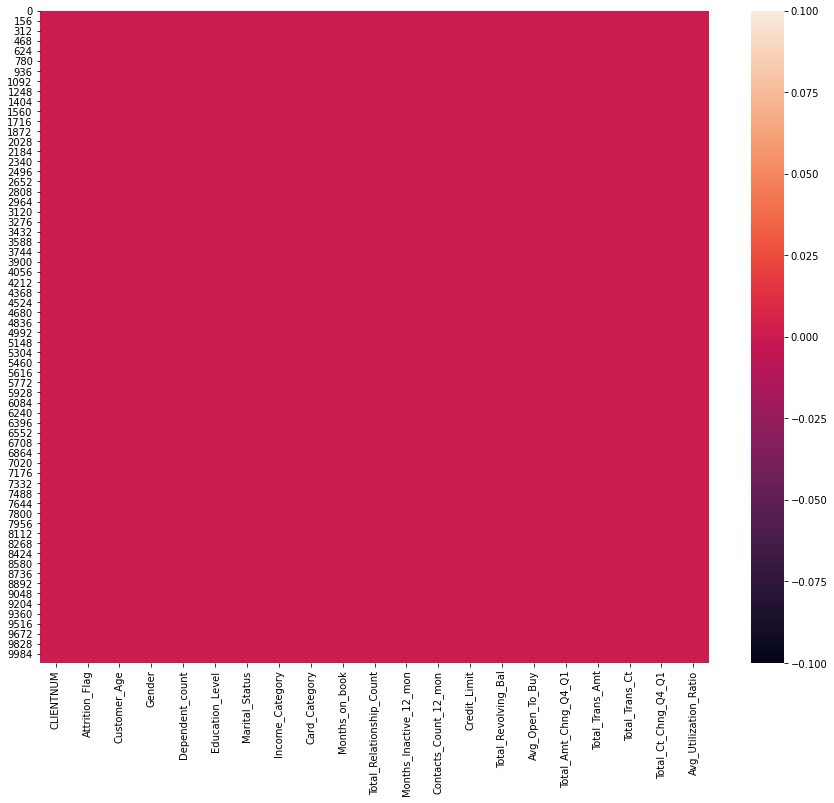

In [539]:
plt.figure( figsize=(15,12))
sns.heatmap( Data.isnull())

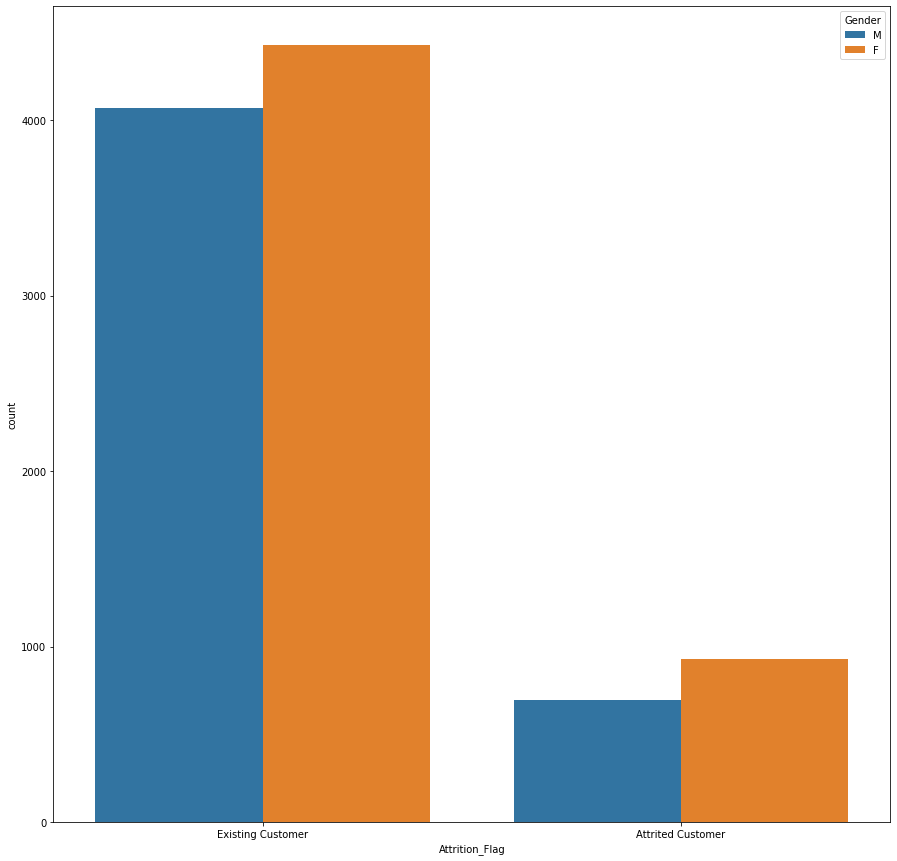

In [540]:
plt.figure(figsize=(15,15))
sns.countplot(x='Attrition_Flag', data=Data, hue='Gender')

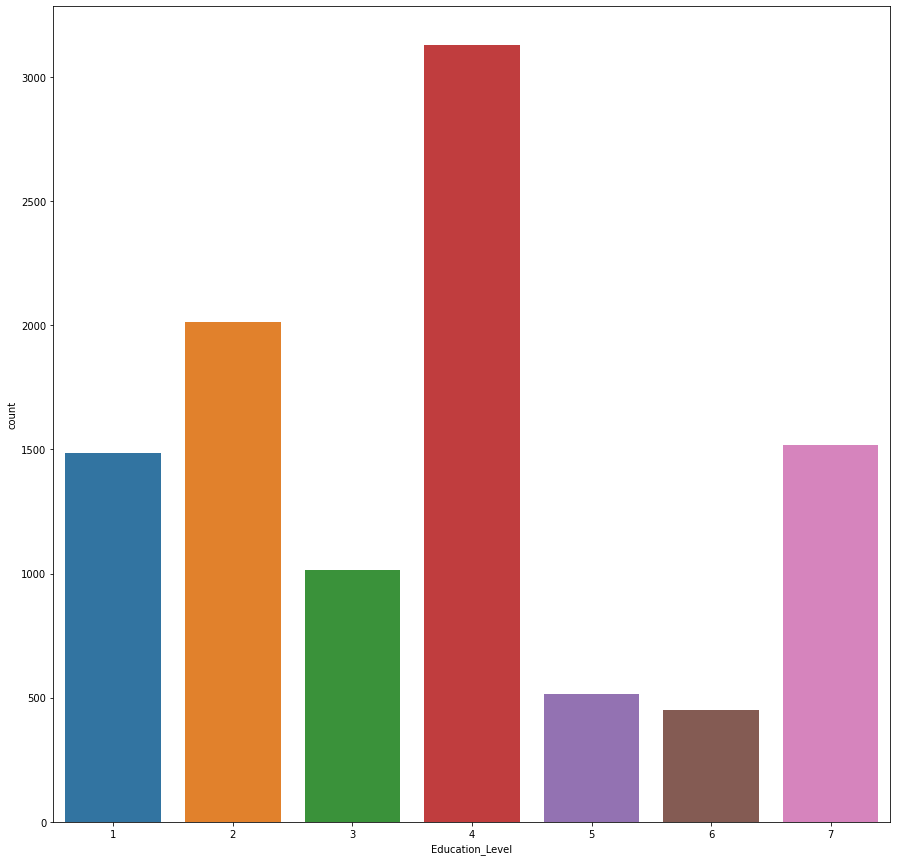

In [773]:
plt.figure(figsize=(15,15))
sns.countplot(x='Education_Level', data=Data)

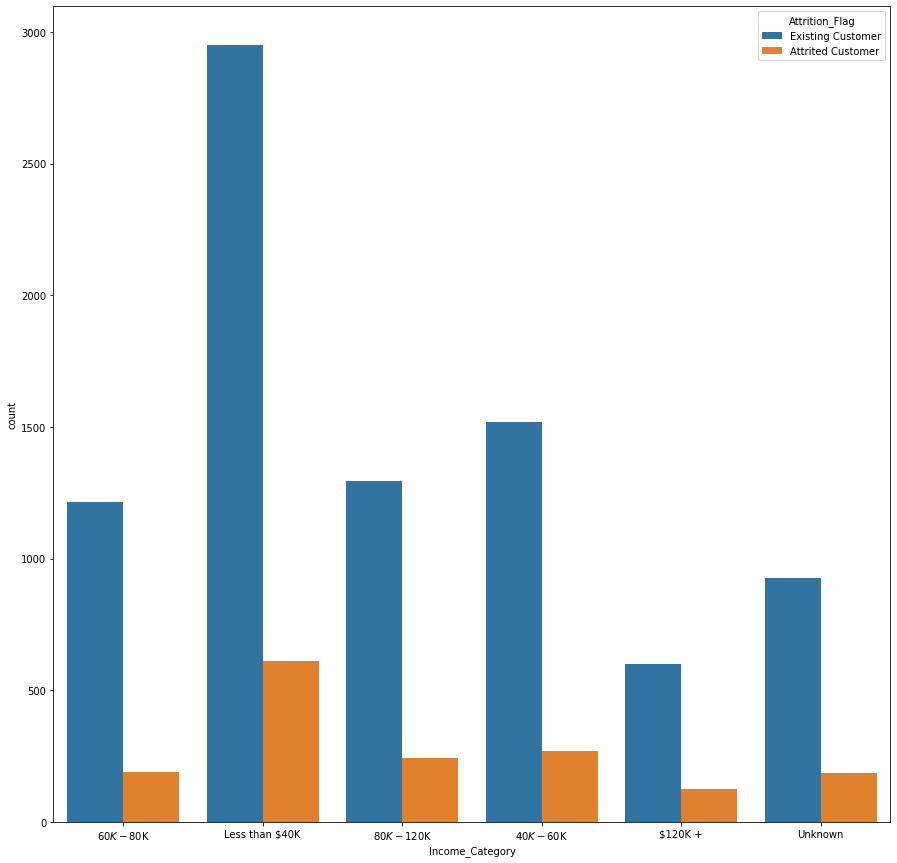

In [542]:
plt.figure(figsize=(15,15))
sns.countplot(x='Income_Category', data=Data, hue='Attrition_Flag')

In [543]:
keys = list(Data.Marital_Status.unique())
keys

['Married', 'Single', 'Unknown', 'Divorced']

In [544]:
Marital_partitions = Data['Marital_Status'].value_counts()/sum(Data['Marital_Status'].value_counts())*100
Marital_partitions

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

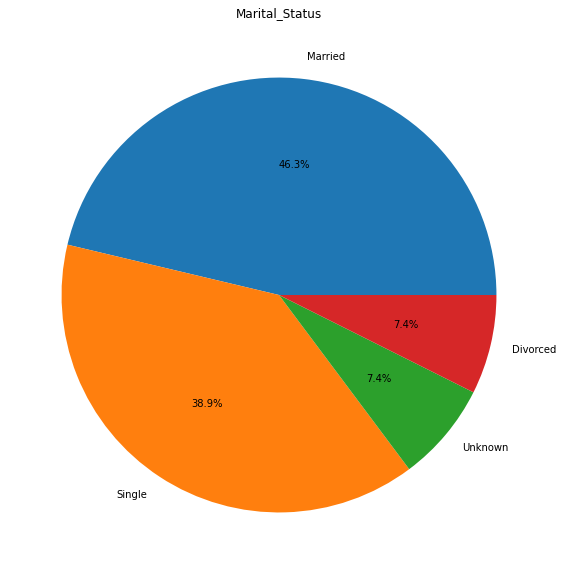

In [545]:
plt.figure(figsize=(20,10))
labels = keys

plt.pie(x = Marital_partitions, labels = labels, autopct="%.1f%%")
plt.title('Marital_Status')
plt.show()

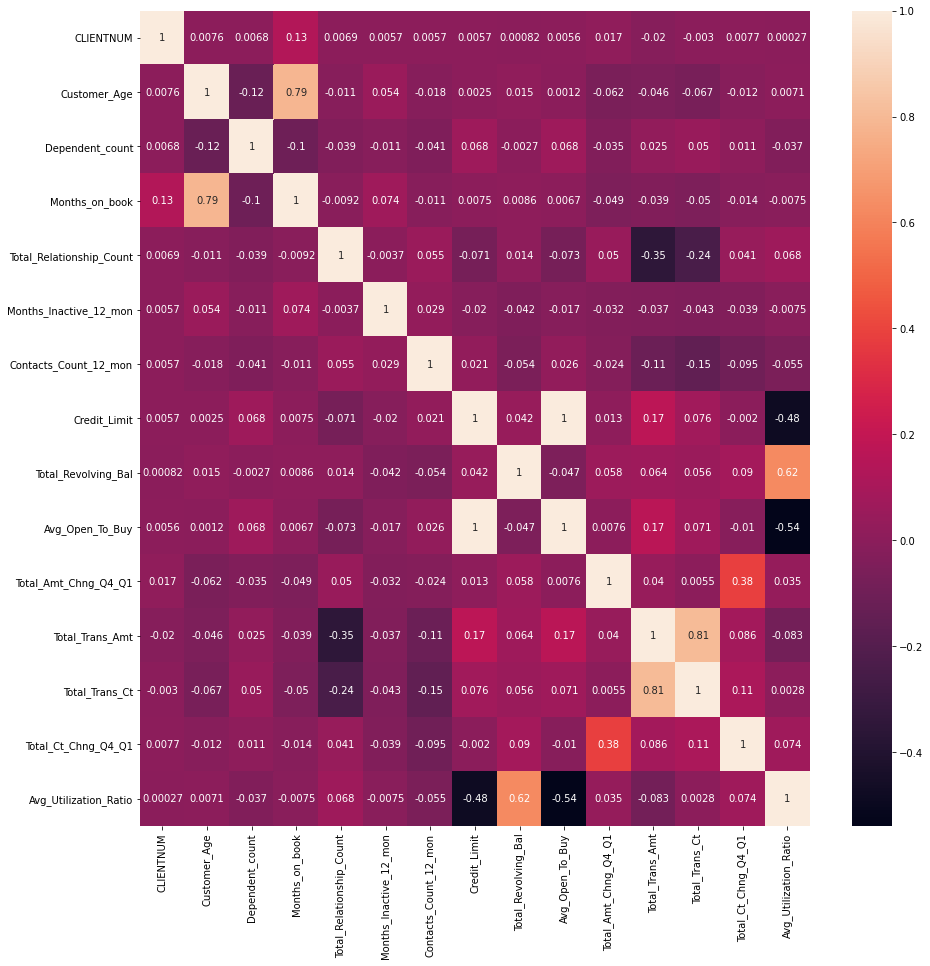

In [546]:
Data_Corr = Data.corr()
corr_index = Data_Corr.index
plt.figure(figsize=(15,15))
sns.heatmap(Data_Corr, annot=True )

In [547]:
Data.shape

(10127, 21)

## Data Cleanup

In [548]:
cleanup_nums = {"Attrition_Flag": {"Existing Customer": 1, "Attrited Customer": 0},
                "Gender": {"M": 1, "F": 0},
                "Card_Category": {"Blue": 1, "Silver": 2, "Gold": 3, "Platinum": 4},
                "Marital_Status": {"Single": 1, "Married": 2, "Divorced": 3, "Unknown": 4},
                "Education_Level": {"Uneducated": 1, "High School": 2, "College": 3, "Graduate": 4, "Post-Graduate": 5, "Doctorate": 6, "Unknown": 7},
                "Income_Category": {"Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5, "Unknown": 6}}

In [549]:
Data = Data.replace(cleanup_nums)

In [550]:
Data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,2,4,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,4,1,2,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,1,2,7,3,2,1,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,0,1,2,2,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,1,2,4,4,2,1,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## Feature importance

In [551]:
X = Data.drop(['Attrition_Flag'], axis=1)
X

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,2,4,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,4,1,2,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,1,2,7,3,2,1,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,0,1,2,2,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,1,2,4,4,2,1,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [552]:
# plt.figure(figsize=(20,20))
# corr_try = X.corr()
# index_cr = corr_try.index
# sns.heatmap(corr_try, annot=True)

In [553]:
Y = Data['Attrition_Flag']
Y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

In [554]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

ETR = ExtraTreesRegressor()
ETR.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [555]:
print(ETR.feature_importances_)

[0.01468214 0.02535159 0.01803716 0.01569401 0.01318401 0.01498148
 0.0117074  0.00518626 0.01712377 0.09468055 0.02851582 0.03258027
 0.01586257 0.14871484 0.01432389 0.04343354 0.16981769 0.21798273
 0.0742983  0.023842  ]


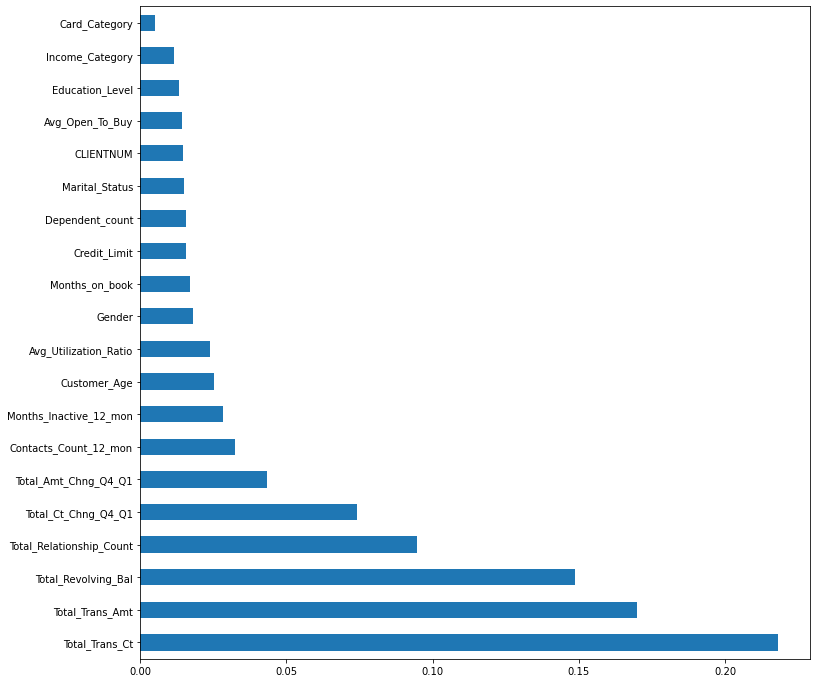

In [556]:
#Features with most importance ('Hours' column is the most important feature in relation to the 'Count')

plt.figure(figsize=(12,12))
feat_importance = pd.Series(ETR.feature_importances_, index=X.columns)
feat_importance.nlargest(34).plot(kind='barh')
plt.show()

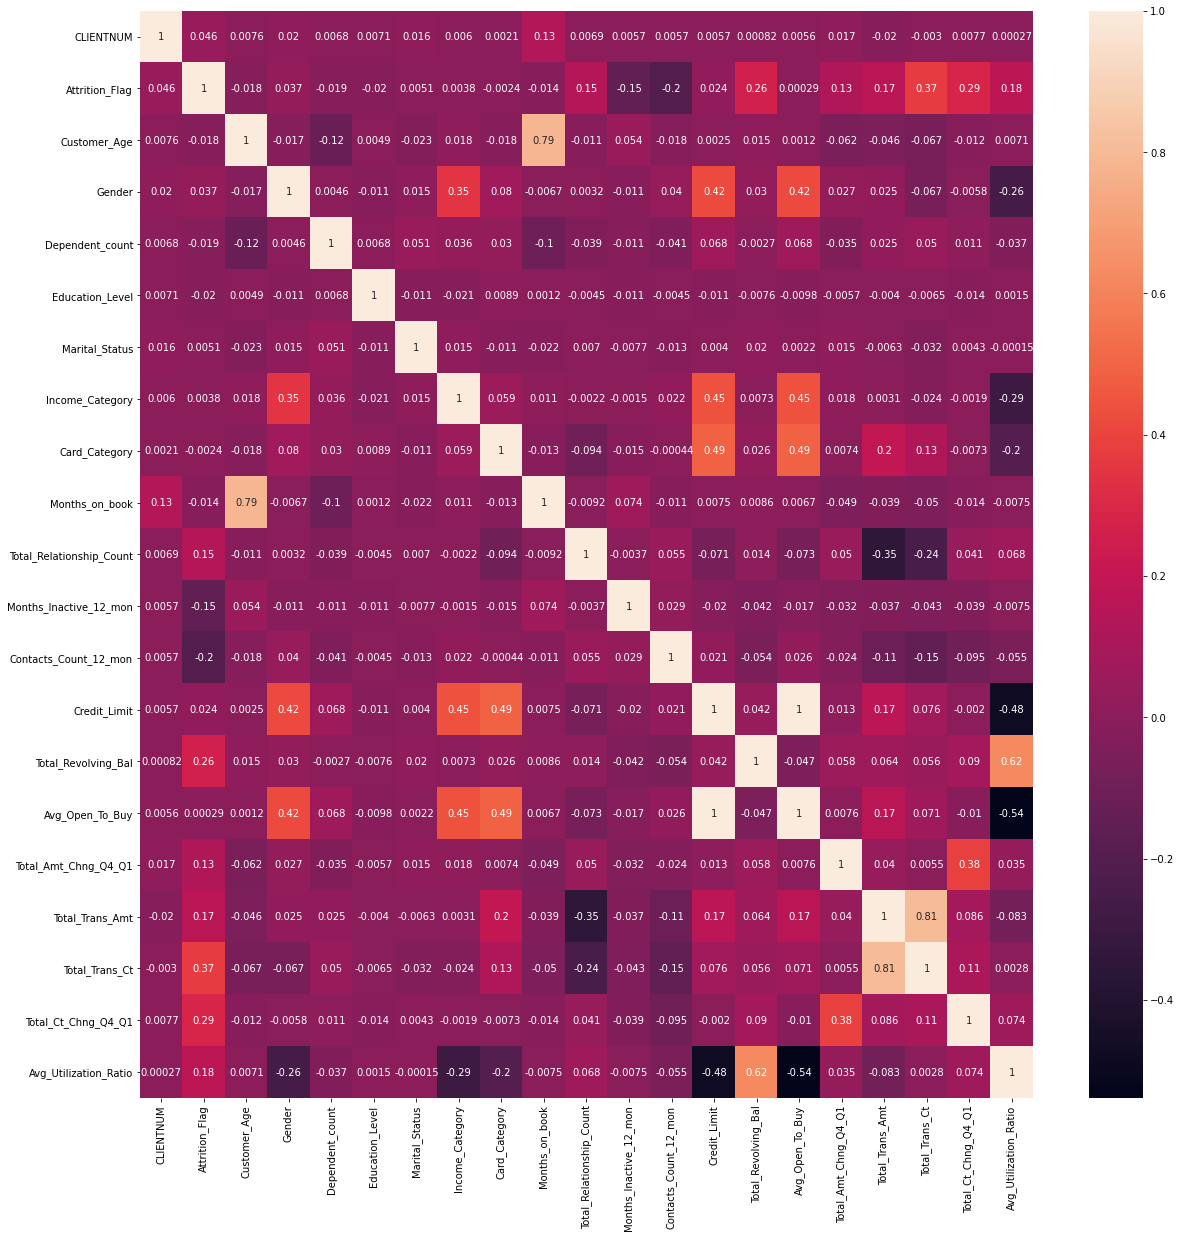

In [717]:
Data_Corr = Data.corr()
corr_index = Data_Corr.index
plt.figure(figsize=(20,20))
sns.heatmap(Data_Corr, annot=True )

In [557]:
X.shape

(10127, 20)

In [596]:
X

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,2,4,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,4,1,2,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,1,2,7,3,2,1,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,0,1,2,2,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,1,2,4,4,2,1,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [637]:
X  = Data.drop(['Attrition_Flag','Card_Category', 'Income_Category','Avg_Open_To_Buy','CLIENTNUM','Education_Level','Marital_Status','Dependent_count','Credit_Limit','Months_on_book','Gender'], axis=1)
# X

In [638]:
X.shape

(10127, 10)

## Data splitting for classification

In [738]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [640]:
from sklearn.preprocessing import MinMaxScaler

In [641]:
scaler=MinMaxScaler()

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [643]:
X_train=scaler.fit_transform(X_train)

In [644]:
X_test=scaler.transform(X_test)

In [645]:
X_train.shape, X_test.shape

((7088, 10), (3039, 10))

## Decision Tree Classification

In [646]:
DTR=DecisionTreeClassifier()

In [647]:
DTR.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [648]:
DTR.score(X_train,y_train)

1.0

In [649]:
y_DTR=DTR.predict(X_test)

In [650]:
print(classification_report(y_test,y_DTR))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       502
           1       0.97      0.97      0.97      2537

    accuracy                           0.95      3039
   macro avg       0.90      0.90      0.90      3039
weighted avg       0.95      0.95      0.95      3039



## Gaussian Naive Bayes

In [759]:
GNB=GaussianNB()

In [760]:
GNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [761]:
GNB.score(X_train,y_train)

0.885158013544018

In [762]:
y_GNB=GNB.predict(X_test)

In [763]:
print(classification_report(y_test,y_GNB))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       502
           1       0.93      0.93      0.93      2537

    accuracy                           0.88      3039
   macro avg       0.78      0.79      0.79      3039
weighted avg       0.88      0.88      0.88      3039



## Random Forest Classicication

In [764]:
RFC=RandomForestClassifier()

In [765]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [766]:
RFC.score(X_train,y_train)

1.0

In [767]:
y_RFC=RFC.predict(X_test)

In [768]:
print(classification_report(y_test,y_RFC))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       502
           1       0.97      0.99      0.98      2537

    accuracy                           0.96      3039
   macro avg       0.95      0.92      0.93      3039
weighted avg       0.96      0.96      0.96      3039



## Neural Network Classification

In [735]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=30, activation='relu', input_shape=(10, )))
model.add(tf.keras.layers.Dense(units=25, activation='relu'))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dense(units=5, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [736]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_89 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_90 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_91 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 6         
Total params: 1,736
Trainable params: 1,736
Non-trainable params: 0
_________________________________________________________________


In [737]:
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])

iterations = model.fit(X_train, y_train, epochs = 150, validation_split=0.2, batch_size=20)

Epoch 1/150
284/284 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8536 - val_loss: 0.2425 - val_accuracy: 0.9104
Epoch 2/150
284/284 [==============================] - 1s 2ms/step - loss: 0.2594 - accuracy: 0.9040 - val_loss: 0.2154 - val_accuracy: 0.9274
Epoch 3/150
284/284 [==============================] - 1s 2ms/step - loss: 0.2375 - accuracy: 0.9140 - val_loss: 0.1901 - val_accuracy: 0.9274
Epoch 4/150
284/284 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9164 - val_loss: 0.1866 - val_accuracy: 0.9274
Epoch 5/150
284/284 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9089 - val_loss: 0.2420 - val_accuracy: 0.9020
Epoch 6/150
284/284 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9197 - val_loss: 0.1815 - val_accuracy: 0.9302
Epoch 7/150
284/284 [==============================] - 1s 2ms/step - loss: 0.2104 - accuracy: 0.9184 - val_loss: 0.1683 - val_accuracy: 0.9358

Text(0, 0.5, 'Training and Validation Loss ')

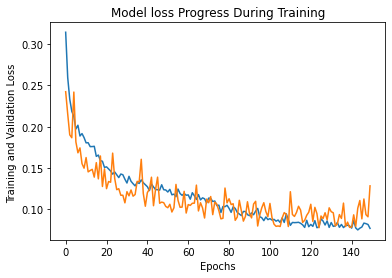

In [769]:
plt.plot(iterations.history['loss'])
plt.plot(iterations.history['val_loss'])

plt.title('Model loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss ')

In [770]:
#Predict based on trained model
Y_predict = (model.predict(X_test) > 0.5).astype("int32")

In [771]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       502
           1       0.96      0.99      0.97      2537

    accuracy                           0.95      3039
   macro avg       0.94      0.89      0.91      3039
weighted avg       0.95      0.95      0.95      3039

